# TP4
### Physique Numérique (PHY-3500)
### Par: Simon Gauthier, Laurent Émond, Thomas Charland
### Présenté à: Xavier Roy-Pomerleau et Antoine Allard
### Remis le: 14 avril 2025

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

### TP4.1 Intégration numérique de la dynamique épidémiologique SIS (50 points)

#### a)

On peut simplement solutionner analytiquement l'équation quadratique suivante:
$$
0=(R_0-1)i-R_0i^2
$$
On trouve donc que les solutions, ou états stationnaires, sont:
$$
i^*_1=0\qquad\qquad i^*_2=1-\frac{1}{R_0}
$$
Puisque $i^*_{1,2}$ doit être dans l'intervalle [0,1], cela impose les valeurs $R_0\ge1$.

#### b)

En utilisant $\frac{di}{d\tau}=i'$, on peut placer dans la forme de Bernouilli, soit $i'+p(\tau)i=q(\tau)i^n$:
$$
    i'+(1-R_0)i=(-R_0)i^2
$$
où $p(\tau)=1-R_0$, $q(\tau)=(-R_0)$ et $n=2$.

On peut alors diviser par $i^{-n}=i^{-2}$:
$$
    i^{-2}i'+(1-R_0)i^{-1}=-R_0
$$
On utilise ensuite la substitution $v=i^{1-n}=i^{-1}$. 
$$
    v^2i'+(1-R_0)v=-R_0
$$
On doit également trouver $i'$ en fonction de $v$. On peut dériver implicitement notre substitution et isoler $i'$, soit $i'=-i^2v'=-\frac{1}{v^2}v'$. On remplace:
$$
-v'+(1-R_0)v=-R_0
$$
On divise par $-1$:
$$
v'+(R_0-1)v=R_0
$$
Cette EDO en $v$ est linéaire, on peut donc la résoudre à l'aide de la méthode du facteur d'intégration $\mu(\tau)$. On multiplie donc l'équation par $\mu(\tau)$:
$$
v'\mu(\tau)+(R_0-1)v\mu(\tau)=R_0\mu(\tau)
$$
On assume pour l'instant la condition $\mu(\tau)(R_0-1)=\mu'(\tau)$. On a donc:
$$
v'\mu(\tau)+v\mu'(\tau)=R_0\mu(\tau)
$$
On remarque que le côté gauche est simplement la dérivée du produit $v\mu(\tau)$. On a donc:
$$
(v\mu(\tau))'=R_0\mu(\tau)
$$
On intègre alors des deux côtés par rapport à $\tau$ et on obtient:
$$
v\mu(\tau)+C=\int R_0\mu(\tau) d\tau
$$
où $C$ est notre constante d'intégration. On isole $v$:
$$
v=\frac{\int R_0\mu(\tau) d\tau - C}{\mu(\tau)}
$$
Maintenant, sachant que $\frac{\mu'(\tau)}{\mu(\tau)}=R_0-1$, on trouve que $\mu(\tau)=e^{\int (R_0-1) d\tau + k}=Ke^{(R_0-1)\tau}$ où $K=e^k$ est une constante d'intégration. On a donc:
$$
v=\frac{K\int R_0e^{(R_0-1)\tau} d\tau - \frac{C}{k}}{Ke^{(R_0-1)\tau}}
$$
On définit $c_1=\frac{c}{K}$ pour avoir:
$$
\begin{align*}
v&=\frac{\int R_0e^{(R_0-1)\tau} d\tau - c_1}{e^{(R_0-1)\tau}}\\
&=\frac{\frac{R_0}{R_0-1}e^{(R_0-1)\tau}+c_2-c_1}{e^{(R_0-1)\tau}}\\
&=\frac{\frac{R_0}{R_0-1}e^{(R_0-1)\tau}+C}{e^{(R_0-1)\tau}}
\end{align*}
$$
où $C=c_2-c_1$ est une constante. On peut alors exprimer $v$ en fonction de $i$ et isoler $i$:
$$
i=\frac{1}{v}=\frac{e^{(R_0-1)\tau}}{\frac{R_0}{R_0-1}e^{(R_0-1)\tau}+C}
$$
On peut ensuite utiliser une condition initiale $i(0)=i_0$ pour obtenir:
$$
i_0=\frac{e^{(R_0-1)0}}{\frac{R_0}{R_0-1}e^{(R_0-1)0}+C}=\frac{1}{\frac{R_0}{R_0-1}+C}
$$
On a donc:
$$
C= \frac{R_0-1-R_0i_0}{i_0(R_0-1)}
$$
On a donc:
$$
i(\tau)=\frac{e^{(R_0-1)\tau}}{\frac{R_0}{R_0-1}e^{(R_0-1)\tau}+\frac{R_0-1-R_0i_0}{i_0(R_0-1)}}=\frac{i_0(R_0-1)e^{(R_0-1)\tau}}{i_0R_0e^{(R_0-1)\tau}+R_0-1-i_0R_0}
$$
pour $\tau>0$. Cela impose la branche positive de la solution particulière, soit $i>0$.

On peut tracer cette solution pour une condition initiale $i_0=0.5$ et une valeur $R_0=1.5$:

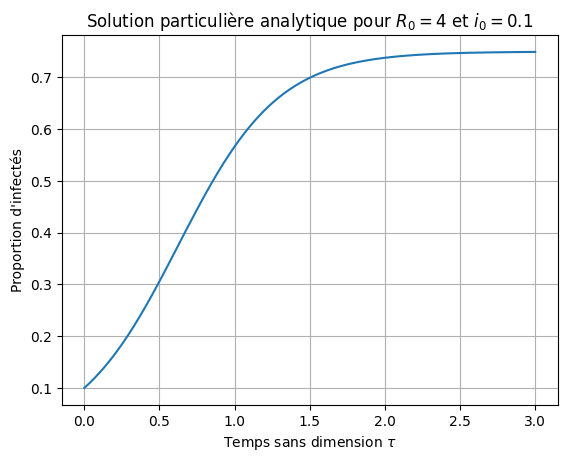

In [19]:
def analytical(times, R0, i0):
    """ Solution particulière analytique du modèle SIR."""
    return (i0*(R0-1)*np.exp((R0-1)*times))/(i0*R0*np.exp((R0-1)*times)+R0-1-i0*R0)

start = 0
end = 3
h = 1e-5 # pas de temps
R0 = 4 # nombre de personnes infectées par une personne infectée
i0 = 0.1 # proportion d'infectés au temps t=0

times = np.linspace(start, end, int((end-start)/h)+1)

plt.plot(times, analytical(times, R0, i0))
plt.title(fr"Solution particulière analytique pour $R_0={R0}$ et $i_0={i0}$")
plt.xlabel(r"Temps sans dimension $\tau$")
plt.ylabel(r"Proportion d'infectés")
plt.grid()
plt.show()

#### c)


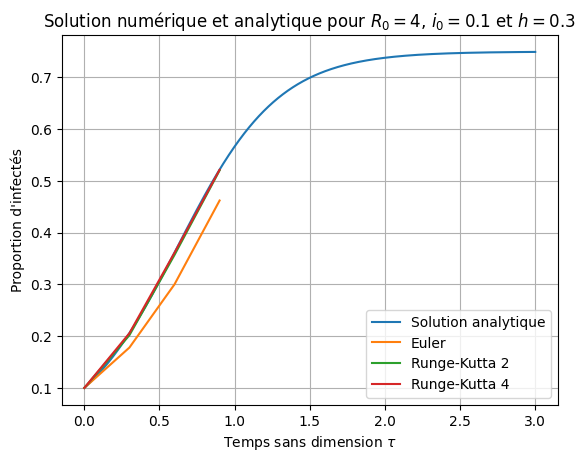

In [ ]:
def infection_rate(i, R0):
    return (R0-1)*i-R0*i**2

h = 0.5

def euler(start, end, h, R0, i0):
    """ Méthode d'Euler pour la résolution de l'ODE"""
    #times = np.linspace(start, end, int((end-start)/h)+1)
    times = [0, h, 2*h, 3*h]
    i = np.zeros_like(times)
    i[0] = i0
    for j in range(1, len(times)):
        i[j] = i[j-1] + h*infection_rate(i[j-1], R0)
    return times, i

def rk2(start, end, h, R0, i0):
    """ Méthode de Runge-Kutta d'ordre 2 pour la résolution de l'ODE"""
    times = np.linspace(start, end, int((end-start)/h)+1)
    times = [0, h, 2*h, 3*h]
    i = np.zeros_like(times)
    i[0] = i0
    for j in range(1, len(times)):
        k1 = h*infection_rate(i[j-1], R0)
        k2 = h*infection_rate(i[j-1] + 0.5*k1, R0)
        i[j] = i[j-1] + k2
    return times, i

def rk4(start, end, h, R0, i0):
    """ Méthode de Runge-Kutta d'ordre 4 pour la résolution de l'ODE"""
    times = np.linspace(start, end, int((end-start)/h)+1)
    times = [0, h, 2*h, 3*h]
    i = np.zeros_like(times)
    i[0] = i0
    for j in range(1, len(times)):
        k1 = h*infection_rate(i[j-1], R0)
        k2 = h*infection_rate(i[j-1] + 0.5*k1, R0)
        k3 = h*infection_rate(i[j-1] + 0.5*k2, R0)
        k4 = h*infection_rate(i[j-1] + k3, R0)
        i[j] = i[j-1] + (k1 + 2*k2 + 2*k3 + k4)/6
    return times, i

times, i_euler = euler(start, end, h, R0, i0)
_, i_rk2 = rk2(start, end, h, R0, i0)
_, i_rk4 = rk4(start, end, h, R0, i0)


continuous_times = np.linspace(start, end, int((end-start)/1e-5)+1) # pas de temps très fin pour la solution analytique
i_analytical = analytical(continuous_times, R0, i0)



plt.plot(continuous_times, i_analytical, label="Solution analytique")
plt.plot(times, i_euler, label=fr"Euler")
plt.plot(times, i_rk2, label=fr"Runge-Kutta 2")
plt.plot(times, i_rk4, label=fr"Runge-Kutta 4")
plt.title(fr"Solution numérique et analytique pour $R_0={R0}$, $i_0={i0}$ et $h=${h}")
plt.xlabel(r"Temps sans dimension $\tau$")
plt.ylabel(r"Proportion d'infectés")
plt.grid()
plt.legend()
plt.show()


#### d)


9.36595001236982e-08 1e-06


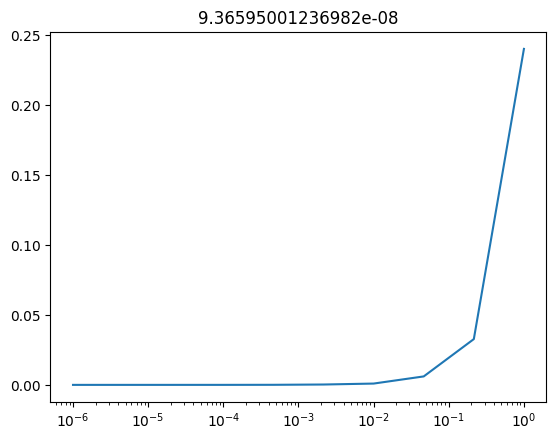

In [60]:
R0i0_pairs = [(1.5, 0.1), (1.5, 0.9), (2, 0.1), (2, 0.9), (3, 0.1), (3, 0.9)]
deltas = [1e-6, 1e-7, 1e-8, 1e-9]


def error(f, start, end, h, R0, i0):
    times, i = f(start, end, h, R0, i0)
    i_analytical = analytical(times, R0, i0)

    error = np.sqrt(1/(len(i)+1)*np.sum((i-i_analytical)**2))
    return error

def golden_ratio_method(f, h1, h4, start, end, R0, i0, max_iter=10):
    z = (1 + np.sqrt(5)) / 2 # nombre d'or
    h2 = h4 - (h4-h1)/z
    h3 = h1 + (h4-h1)/z

    errors = []

    for _ in range(max_iter):
        error_h2 = error(f, start, end, h2, R0, i0)

        error_h3 = error(f, start, end, h3, R0, i0)

        if error_h2 < error_h3:
            h4, h3 = h3, h2
            h2 = h4 - (h4-h1)/z
        else:
            h2, h1 = h3, h2
            h3 = h1 + (h4-h1)/z
        
        errors.append(error_h2)
    return errors, h2

h1 = 1e-6
h4 = 1e-4

# errors, h_final = golden_ratio_method(euler, h1, h4, start, end, 4, 0.1)

# plt.title(f"{min(errors)}, {h_final}")
# plt.plot(errors, label="Euler")
# plt.show()

hs = np.logspace(-6, 0, 10)
errors = [error(euler, start, end, h, R0, i0) for h in hs]
print(errors[0], hs[0])
plt.title(min(errors))
plt.plot(hs, errors, label="Euler")
plt.xscale("log")
plt.show()

In [ ]:


def golden_ratio_method(x1, x4, method, start, end, R0, i0, delta):
    """ Méthode du nombre d'or pour trouver le pas de temps optimal """
    x2 = x4 - (x4-x1)/z
    x3 = x1 + (x4-x1)/z
    
    final_x = 0
    final_err = 0

    while (x4-x1) > 1e-10:
        err_x2 = error(method, start, end, x2, R0, i0)
        if 0.99*delta < err_x2 < 1.01*delta:
            final_x = x2
            final_err = err_x2
            break

        err_x3 = error(method, start, end, x3, R0, i0)
        if err_x2 < err_x3:
            x4, x3 = x3, x2
            x2 = x4 - (x4-x1)/z

        else:
            x2, x1 = x3, x2
            x3 = x1 + (x4-x1)/z

    return final_x, final_err


R0, i0 = R0i0_pairs[-2]

for j, method in enumerate([euler, rk2, rk4]):
    plt.subplot(3, 1, j+1)
    plt.title(method.__name__)
    plt.xlabel(r"Pas de temps $h$")
    plt.ylabel(r"Erreur")
    plt.xscale("log")
    plt.yscale("log")
    plt.grid()
    hs_opt = []
    errs = []
    for delta in deltas:    
        h1 = 1e-2
        h4 = 1e-0
        h_opt, err = golden_ratio_method(h1, h4, method, start, end, R0, i0, delta)
        hs_opt.append(h_opt)
        errs.append(err)
    plt.plot(deltas, hs_opt, 'o', label=fr"$\delta={delta}$")

plt.show()

#### e)


### TP4.2 Simulation Monte-Carlo de la dynamique SIS (50 points)

#### a)


#### b)


#### c)


#### d)